In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("updated_pollution_dataset.csv")

In [4]:
dataset.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [5]:
dataset.shape

(5000, 10)

In [6]:
dataset.isnull()

Temperature  Humidity  PM2.5   PM10    NO2    SO2     CO  \
0           False     False  False  False  False  False  False   
1           False     False  False  False  False  False  False   
2           False     False  False  False  False  False  False   
3           False     False  False  False  False  False  False   
4           False     False  False  False  False  False  False   
...           ...       ...    ...    ...    ...    ...    ...   
4995        False     False  False  False  False  False  False   
4996        False     False  False  False  False  False  False   
4997        False     False  False  False  False  False  False   
4998        False     False  False  False  False  False  False   
4999        False     False  False  False  False  False  False   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                             False               False        False  
1                             False               False        False  
2                             False               False        False  
3                             False               False        False  
4                             False               False        False  
...                             ...                 ...          ...  
4995                          False               False        False  
4996                          False               False        False  
4997                          False               False        False  
4998                          False               False        False  
4999                          False               False        False  

[5000 rows x 10 columns]

In [7]:
print(dataset.isnull().sum())
dataset = dataset.dropna() 

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [8]:
dataset.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
dataset.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [11]:
dataset["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Air Quality'] = le.fit_transform(dataset['Air Quality']) 
print("Encoded Label: ",le.classes_)

Encoded Label:  ['Good' 'Hazardous' 'Moderate' 'Poor']


In [13]:
dataset["Air Quality"].value_counts()

Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

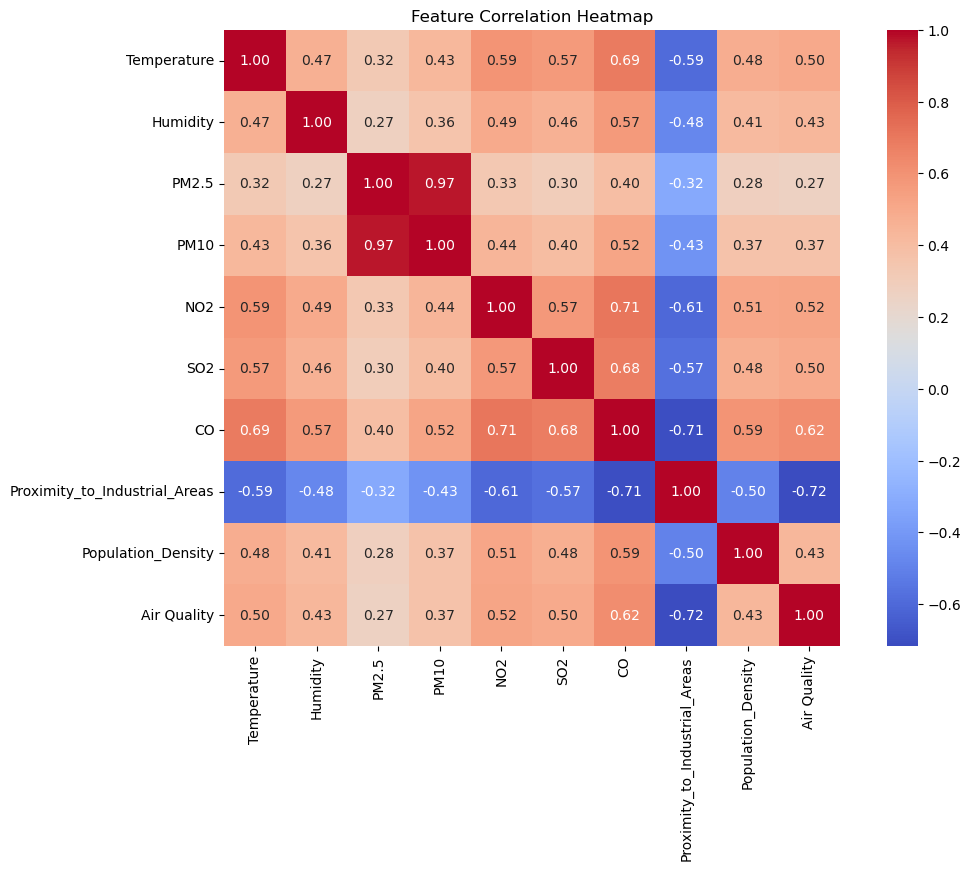

In [14]:
import seaborn as sns
# Compute correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

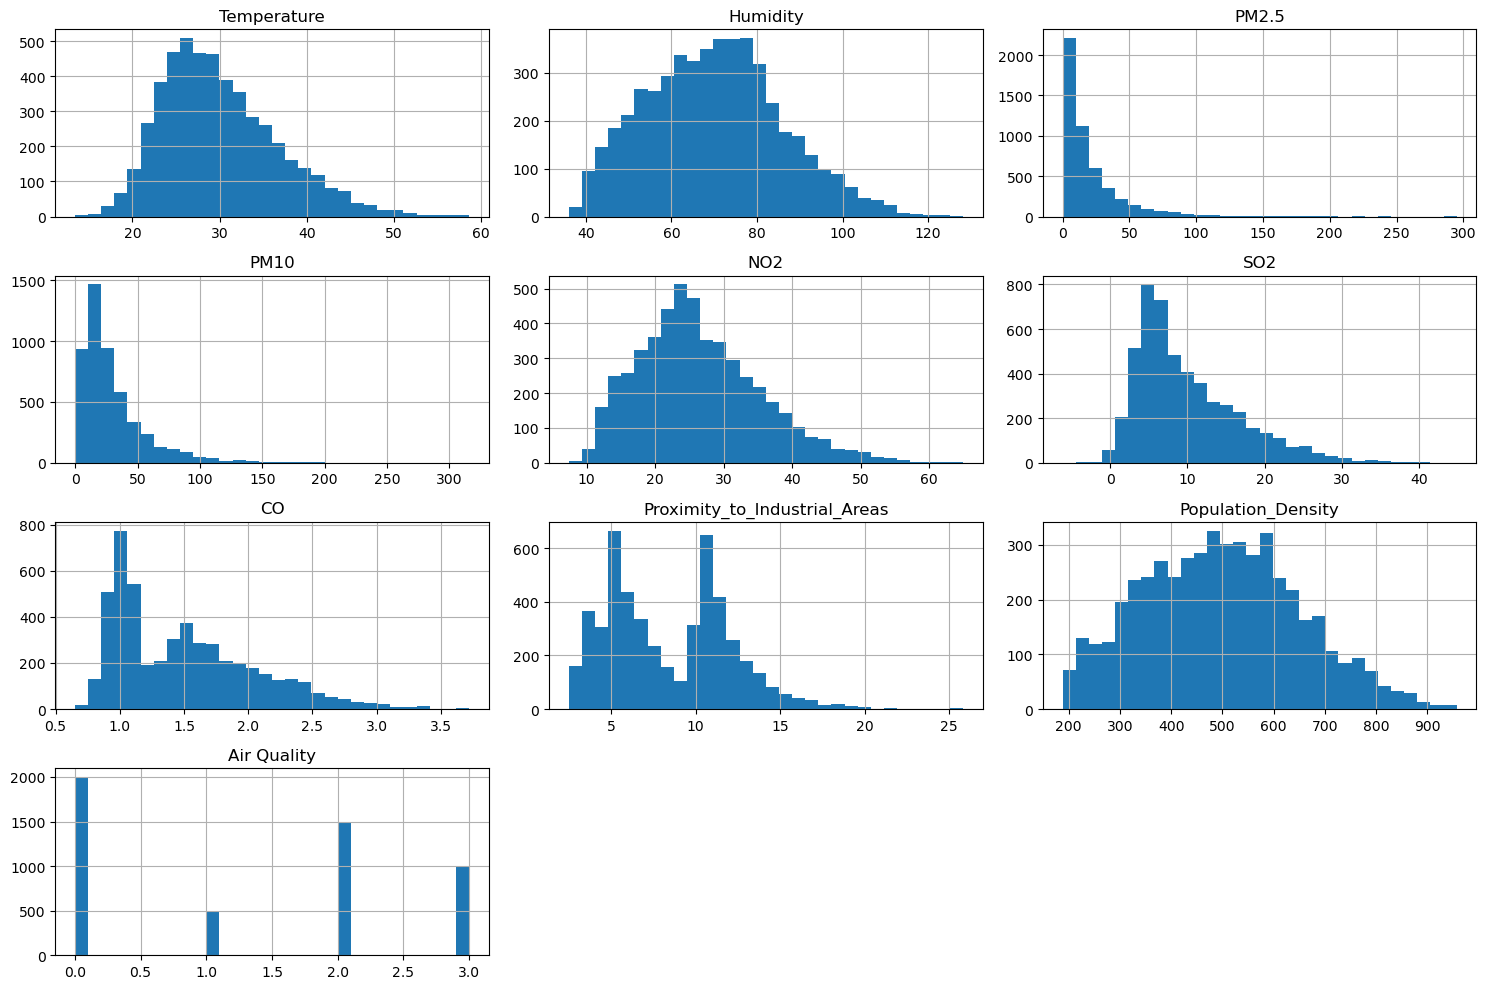

C:\Users\muskan\AppData\Local\Temp\ipykernel_22964\1705815343.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[column], shade=True, label=column)
C:\Users\muskan\AppData\Local\Temp\ipykernel_22964\1705815343.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[column], shade=True, label=column)
C:\Users\muskan\AppData\Local\Temp\ipykernel_22964\1705815343.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[column], shade=True, label=column)
C:\Users\muskan\AppData\Local\Temp\ipykernel_22964\1705815343.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
T

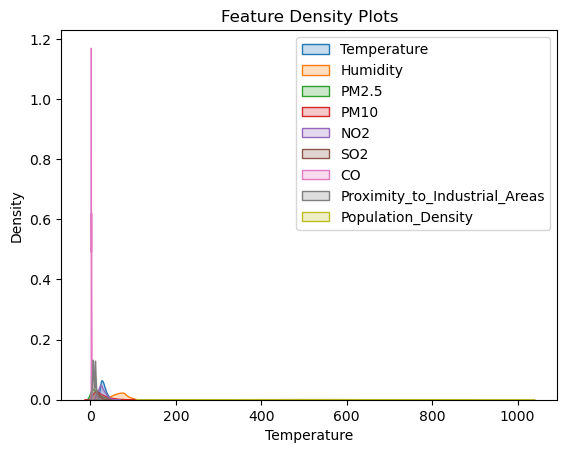

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features
dataset.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

for column in dataset.columns[:-1]:  
    sns.kdeplot(dataset[column], shade=True, label=column)
plt.legend()
plt.title("Feature Density Plots")
plt.show()

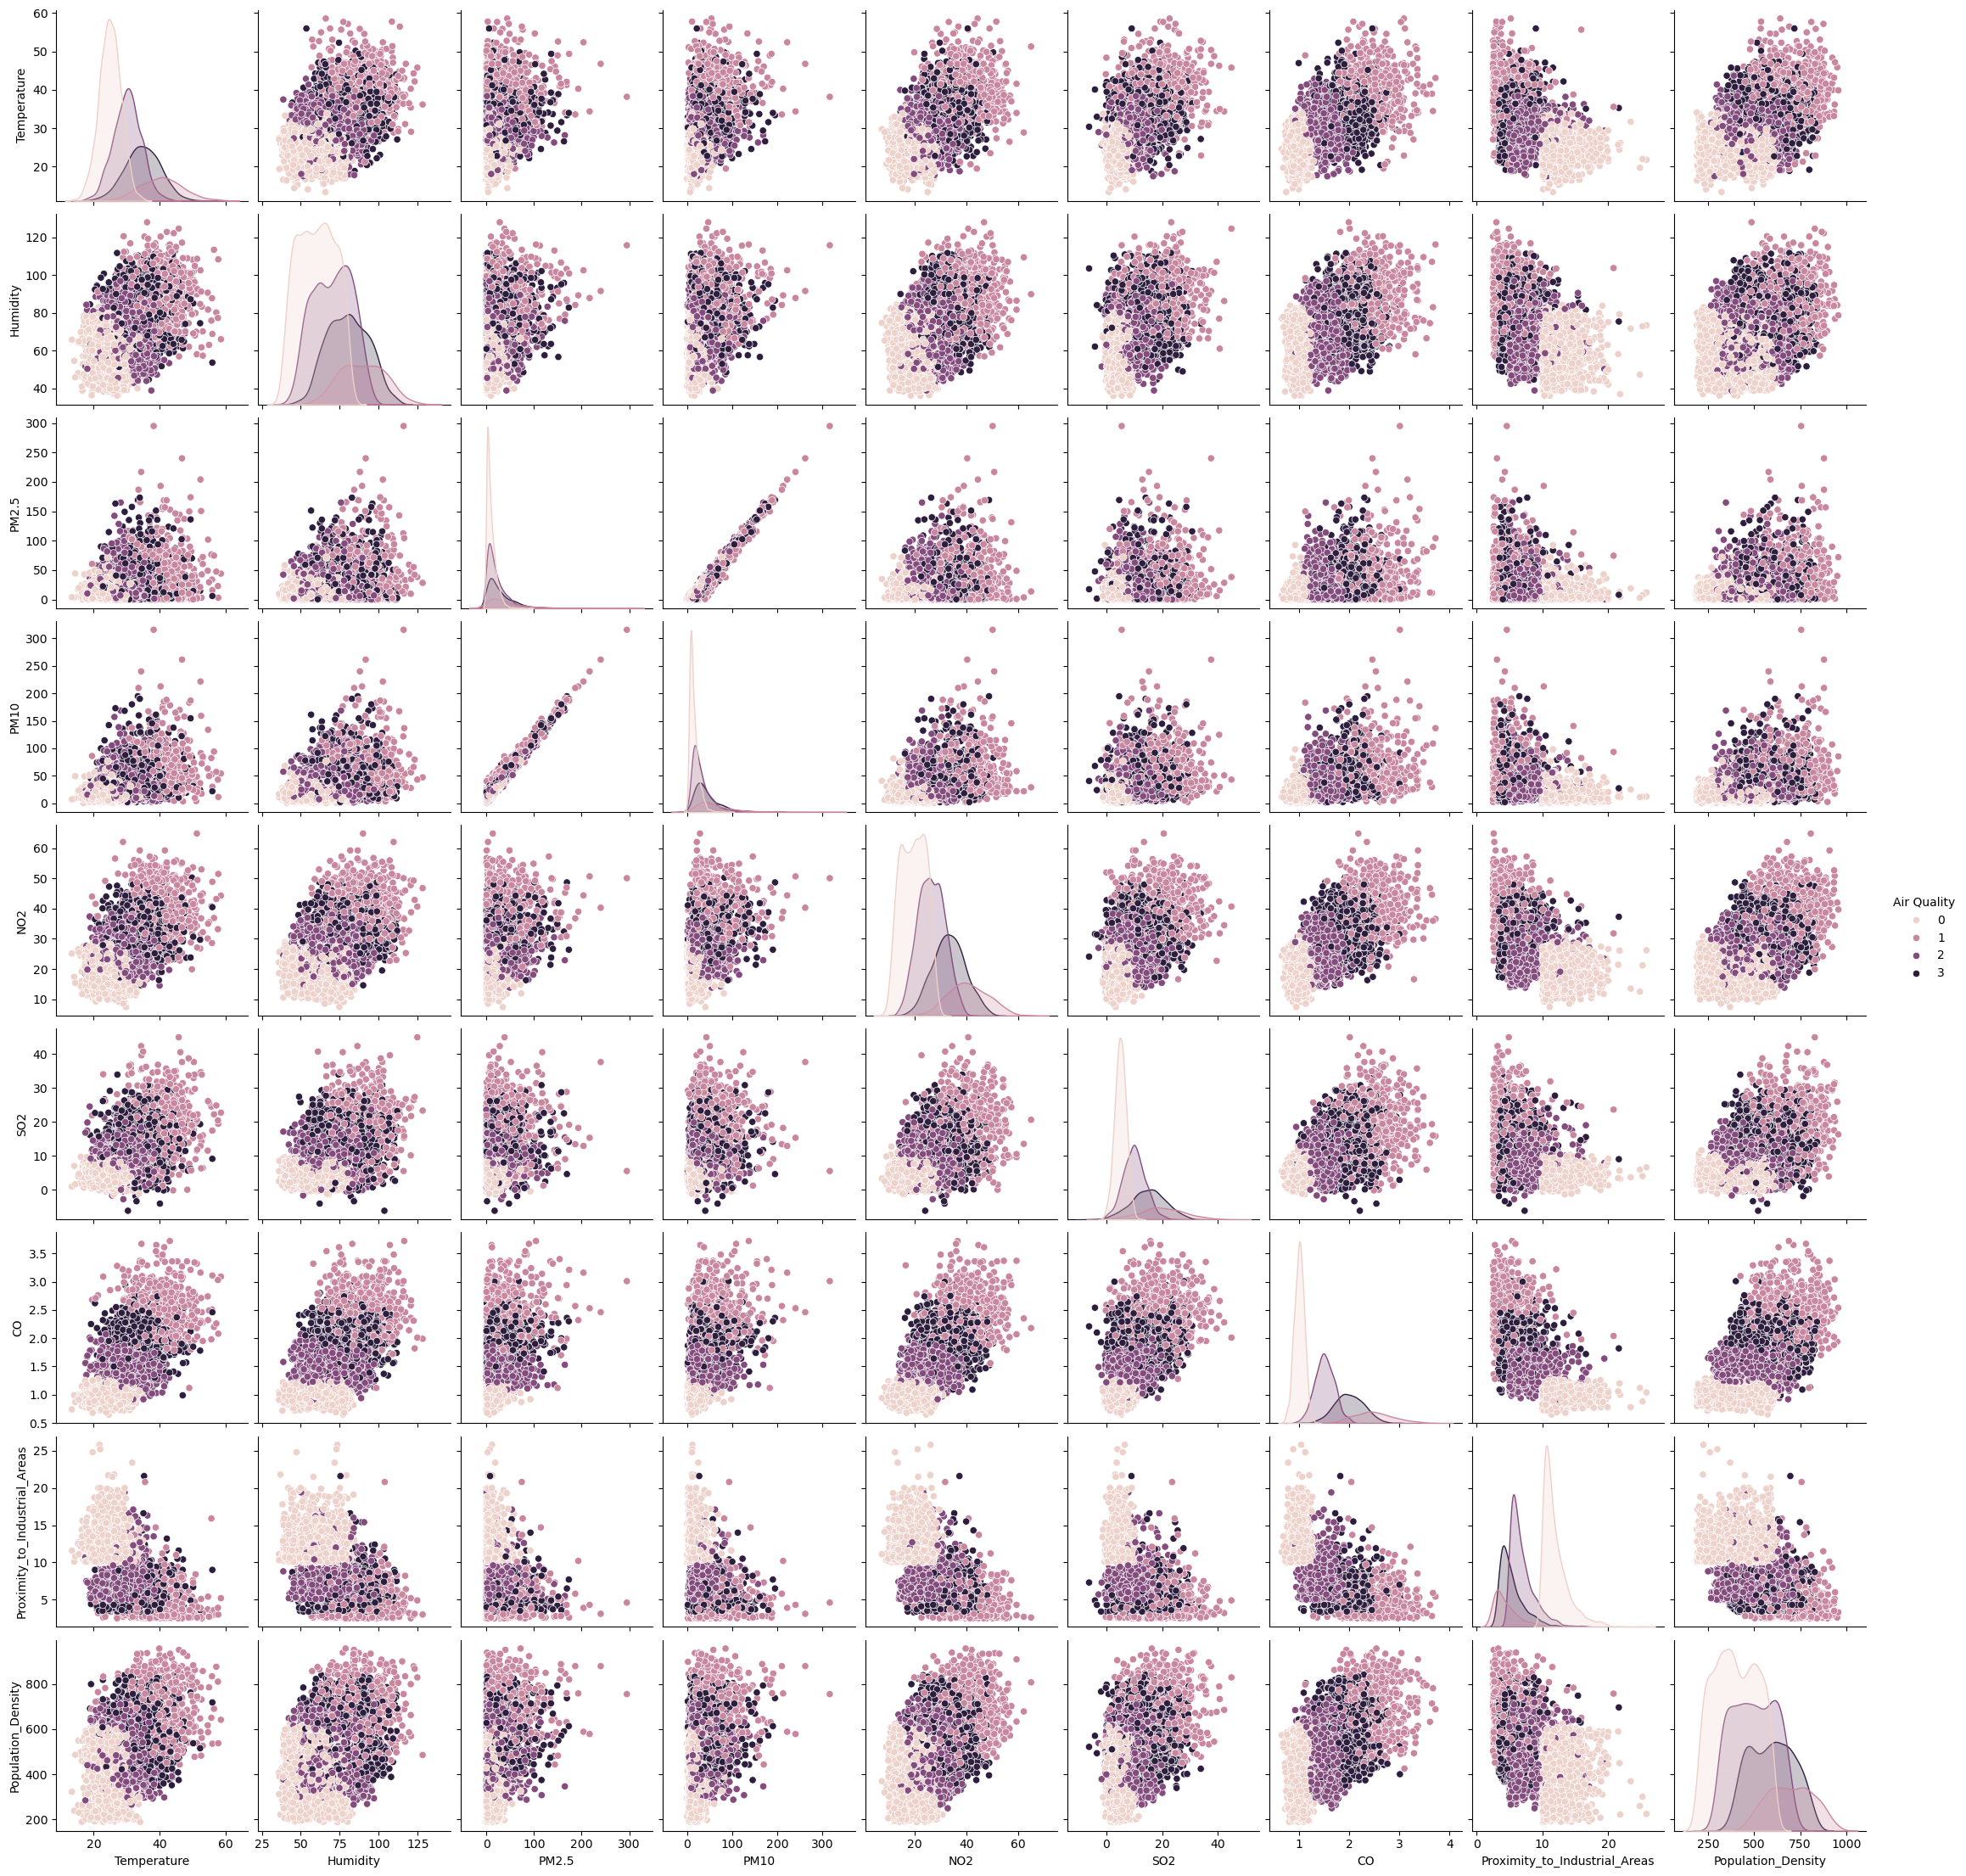

In [16]:
#Pairwise Relationships (Scatter Plots / Pairplot)
sns.pairplot(dataset, hue='Air Quality', diag_kind='kde')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X = dataset.drop('Air Quality', axis=1)  # Features
y = dataset['Air Quality']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
#Initializing Random forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
#Now Train the Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Evaluating the model 
# 1- Make Predictions
y_pred = rf_model.predict(X_test)

In [21]:
y_pred

array([2, 0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 2, 3, 0, 2, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 3, 3, 2, 0, 2,
       3, 0, 0, 3, 3, 2, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 2,
       0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0,
       2, 3, 0, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 2, 0, 0, 0, 3, 3, 3, 2, 0,
       0, 0, 1, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 0, 0, 3, 3, 0, 3, 2, 0, 2,
       3, 2, 3, 0, 2, 2, 2, 1, 2, 3, 2, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 3, 3, 1, 2, 2, 3, 0, 1, 0, 0, 3, 0, 3, 3,
       0, 3, 0, 2, 0, 3, 3, 3, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 3, 2, 0, 0, 2, 0, 2, 1, 1, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0,
       3, 3, 0, 1, 0, 3, 1, 3, 0, 2, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 3, 3, 2, 0, 1, 2,
       3, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 2, 2, 2, 1, 3, 2, 1, 0, 1, 1, 3,
       2, 2, 1, 0, 2, 2, 2, 3, 2, 1, 2, 0, 0, 1, 3,

In [22]:
# 2-Measuring the Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 95.10%


In [23]:
# Generating a Classification Report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.90      0.80      0.85       100
           2       0.96      0.97      0.97       300
           3       0.87      0.90      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[400   0   0   0]
 [  0  80   0  20]
 [  1   0 291   8]
 [  0   9  11 180]]


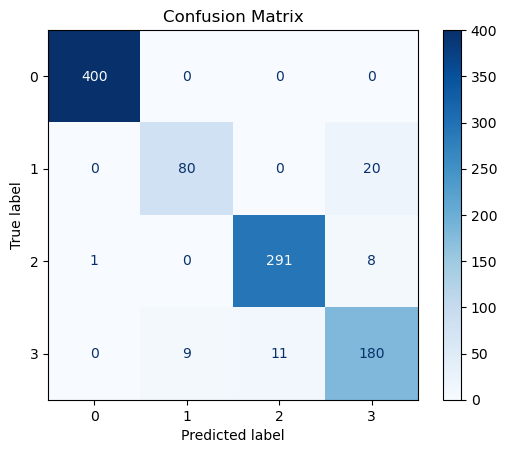

In [25]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

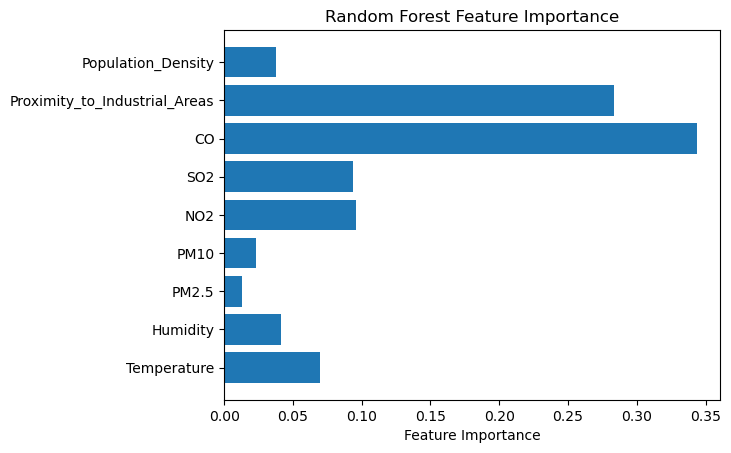

In [26]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()